In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, t
# Read the data
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

In [2]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Question
A test the claims that Wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.

### Step 1: State Hypothesis

**Null Hypothesis** - The median alcohol content has no significant influence on the quality rating of the wine

**Alternative Hypothesis** - The the median alcohol content has a significant influence on the quality rating of the wine.

### Step 2: Specify the significance level(alpha)

We are going to choose an alpha of 0.05


### Step 3 : Calculate the median

First split the data into lower and higher and calculate the median 
alcohol content.

The threshold for higher and lower quality wine was 5. Above 5 is high quality, below 5 is low quality

In [4]:
# combine the red and white wine data
all_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# combine the red and white wine data
all_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# split the data into two groups based on quality rating
higher_quality = all_wine[all_wine['quality'] > 5]['alcohol']
lower_quality = all_wine[all_wine['quality'] <= 5]['alcohol']

# calculate the median alcohol content for each group
median_higher_quality = np.median(higher_quality)
median_lower_quality = np.median(lower_quality)

print("Median alcohol content for higher quality wines: ", median_higher_quality)
print("Median alcohol content for lower quality wines: ", median_lower_quality)


Median alcohol content for higher quality wines:  10.8
Median alcohol content for lower quality wines:  9.6


/home/henry/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/henry/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


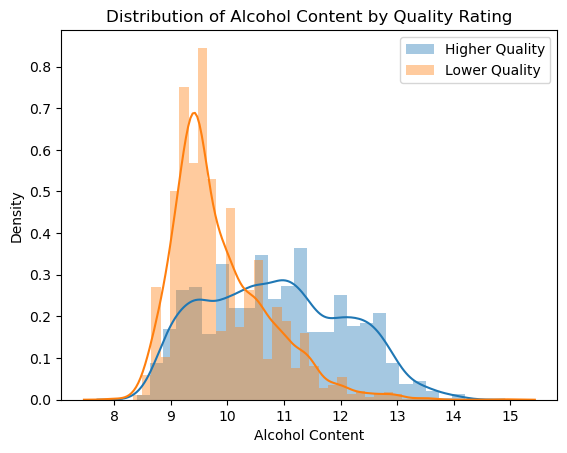

In [5]:
# plot the distribution of alcohol content for each group
sns.distplot(higher_quality, label='Higher Quality')
sns.distplot(lower_quality, label='Lower Quality')

# add labels and legend
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.title('Distribution of Alcohol Content by Quality Rating')
plt.legend()
plt.show()

### Step 4 : Determine and calculate the suitable test
I will be using the 2 sampled t-test are we are using 2 similar datasets.


In [6]:
# calculate the two-sample t-test
t_stat, p_val = ttest_ind(higher_quality, lower_quality)
print("Two-sample t-test statistic: ", t_stat)
print("p-value: ", p_val)

Two-sample t-test statistic:  34.617777854789004
p-value:  3.822529108292893e-241


### Step 5: Interpret the results
The p value of 0.38 is less than the alpha of 0.05. This means we can reject the null value that the  median alcohol content has no significant influence on the quality rating of the wine.

Therefore, we can conclude that there is a statistically significant difference in the median alcohol content between higher and lower quality wines